In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.dates as mdates

In [7]:
os.path.exists("backtest_result")
save_path = 'figure/' 
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [8]:
qpl_number = [1,2,3,4]

In [9]:
action = [0 for i in range(len(qpl_number))]
for i in range(len(qpl_number)):
    qpl = qpl_number[i]
    action[i] = pd.read_csv(f'backtest_result/actions/QFPIS_QPL_{qpl}_action_record.csv')

EmptyDataError: No columns to parse from file

In [ ]:
import matplotlib
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rcParams["font.family"] = 'STIXGeneral'

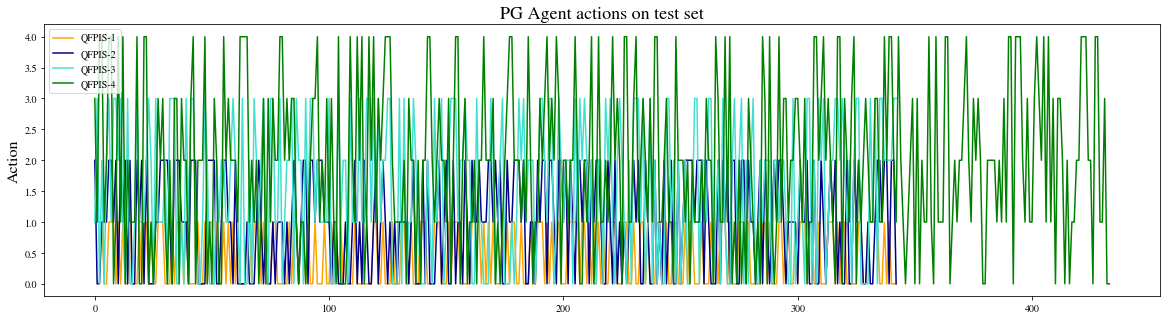

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.plot(action[0],color='orange',label='QFPIS-1')
plt.plot(action[1],color='darkblue',label='QFPIS-2')
plt.plot(action[2],color='turquoise',label='QFPIS-3')
plt.plot(action[3],color='green',label='QFPIS-4')
#plt.xlabel("Epoch",fontsize=15)
plt.ylabel("Action",fontsize=16)
plt.legend(loc='upper left',fontsize=10)
plt.title("PG Agent actions on test set",fontsize=18)
plt.savefig("figure/policy_actions_test.png",dpi=400,bbox_inches = 'tight')

In [11]:
actions = np.load('backtest_result/QFPIS_warm_up_plot_action_QPL_4_forex_data.npy')
eps = 1e-8
actions.shape

(50, 434, 10)

In [12]:
actions = actions[:,11,:]

In [13]:
actions.shape

(50, 10)

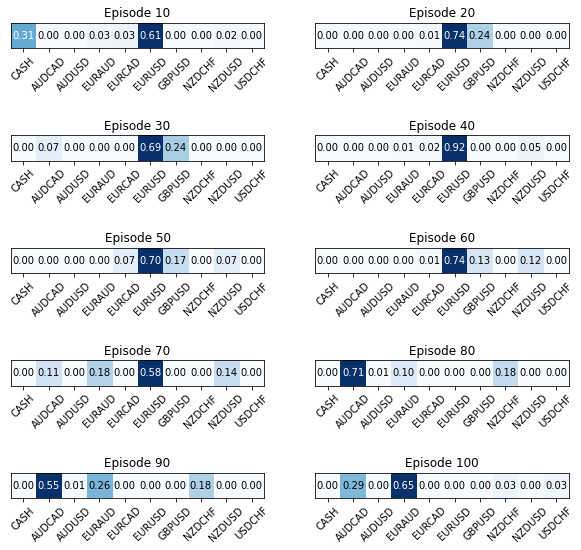

In [16]:

# 产品列表
products = ["CASH", "AUDCAD", "AUDUSD", "EURAUD", "EURCAD", "EURUSD", "GBPUSD", "NZDCHF", "NZDUSD", "USDCHF"]

# 设置画布大小
fig, axs = plt.subplots(5, 2, figsize=(10, 10))

# 用于计数子图编号
plot_num = 0

for i in range(50):
    if (i+1) % 5 == 0:
        action = actions[i]
        action = np.clip(action, 0, 1)
        weights = action
        weights /= (weights.sum() + eps)
        weights[0] += np.clip(1 - weights.sum(), 0, 1)

        # 将一维数组转换为二维数组，使其适用于imshow函数
        investment_weights_2d = weights.reshape(1, 10)

        # 计算子图的行和列
        row = plot_num // 2
        col = plot_num % 2

        # 在子图上创建热力图
        axs[row, col].imshow(investment_weights_2d, cmap='Blues', aspect='equal', vmin=0, vmax=weights.max())

        # 在每个方块上显示权重数值
        for j in range(10):
            axs[row, col].annotate(f"{investment_weights_2d[0, j]:.2f}", (j, 0), ha="center", va="center", color="white" if investment_weights_2d[0, j] > 0.5 * weights.max() else "black")

        # 添加标题
        axs[row, col].set_title(f'Episode {2*i+2}')

        # 添加 x 轴标签
        axs[row, col].set_xticks(range(10))
        axs[row, col].set_xticklabels(products, rotation=45)

        # 隐藏 y 轴刻度
        axs[row, col].set_yticks([])

        plot_num += 1

# 使用 tight_layout 调整间距


figure_name = "weight_against_episode.png"
plt.savefig(os.path.join(save_path, figure_name),dpi=400,bbox_inches = 'tight')
plt.show()

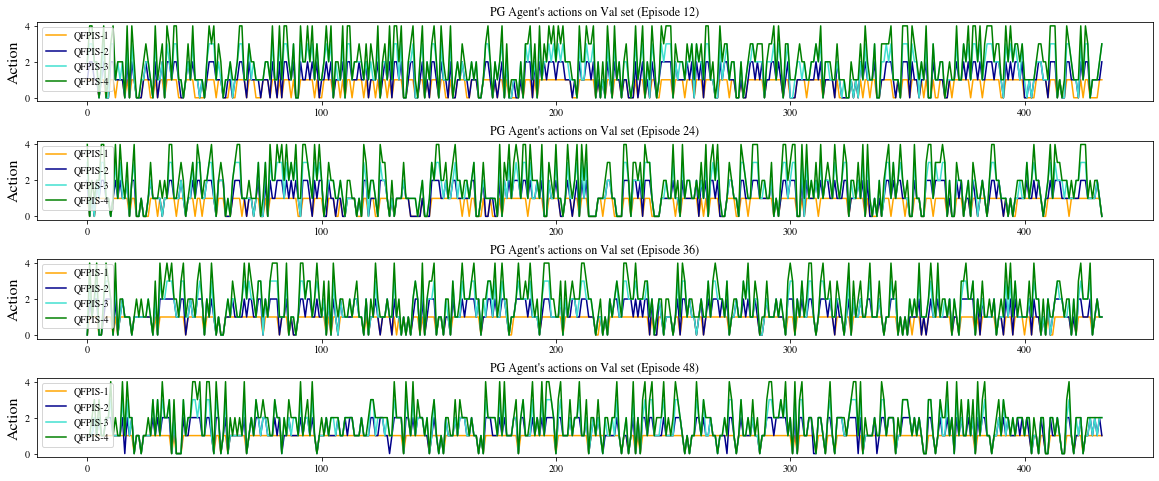

In [ ]:
episode = 50
num_plots = episode // 12

fig, axes = plt.subplots(num_plots, 1, figsize=(20.0, 2.0*num_plots))
plt.subplots_adjust(hspace=0.5)

for j in range(episode):
    if (j+1) % 12 ==0 and j >0:
        action = [0 for i in range(len(qpl_number))]
        for i in range(len(qpl_number)):
            qpl = qpl_number[i]
            action[i] = pd.read_csv(f'backtest_result/val_policy_actions/QFPIS_new_val_QPL_{qpl}_ep_{j+1}_forex_data_action_record.csv')
        
        row = j // 12  # 以10个episode为一组，计算当前子图的行索引
        col = j % 12   # 计算当前子图的列索引
        ax = axes[row] if num_plots > 1 else axes  # 如果只有一行子图，就不需要使用数组
        
        ax.plot(action[0],color='orange',label='QFPIS-1')
        ax.plot(action[1],color='darkblue',label='QFPIS-2')
        ax.plot(action[2],color='turquoise',label='QFPIS-3')
        ax.plot(action[3],color='green',label='QFPIS-4')
        
        ax.set_ylabel("Action",fontsize=16)
        ax.set_title(f"PG Agent's actions on Val set (Episode {j+1})",fontsize=12)
        ax.legend(loc='upper left',fontsize=10)
figure_name = "pg_agent_action_against_episode.png"
plt.savefig(os.path.join(save_path, figure_name),dpi=400,bbox_inches = 'tight')
plt.show()